Name:Ghanshyam Kachhia

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import datetime

In [ ]:
file_path = '/content/ev_data.xlsx'
individual_data = pd.read_excel(file_path, sheet_name="ev_data")

# Preview the data structure to identify relevant columns
individual_data.head()

,Aadhar Number/Unique ID,Name,Age,Annual Income (INR),Vehicle Ownership,Interest in EVs,Preferred Features,Financing Options,Region,Gender
0,903119000000,Yash,52,1723434,1,High,High Performance,No Down Payment,Region-28,Male
1,909446000000,Prit,65,1729693,1,High,Long Range,Low Interest,Region-95,Male
2,620887000000,Meet,54,1610168,0,High,Long Range,No Down Payment,Region-80,Male
3,372451000000,Drashti,54,196563,0,Medium,High Performance,Low Interest,Region-22,Female
4,162883000000,Saloni,33,804637,0,Low,High Performance,No Down Payment,Region-57,Female


In [ ]:
# Define age groups for segmentation
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
individual_data['Age Group'] = pd.cut(individual_data['Age'], bins=bins, labels=labels, right=False)

# Analyze EV interest and preferred features by age group
age_group_analysis = individual_data.groupby('Age Group').agg({
    'Interest in EVs': lambda x: x.value_counts().idxmax(),
    'Preferred Features': lambda x: x.value_counts().idxmax(),
    'Aadhar Number/Unique ID': 'count'  # Count of customers in each group
}).rename(columns={'Aadhar Number/Unique ID': 'Customer Count'})

# Display the age group analysis
age_group_analysis

<ipython-input-36-80ab37732fd5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = individual_data.groupby('Age Group').agg({


,Interest in EVs,Preferred Features,Customer Count
Age Group,,,
18-25,High,High Performance,229
26-35,High,Affordable Price,355
36-45,High,Long Range,343
46-55,High,Fast Charging,339
56-65,High,Long Range,333


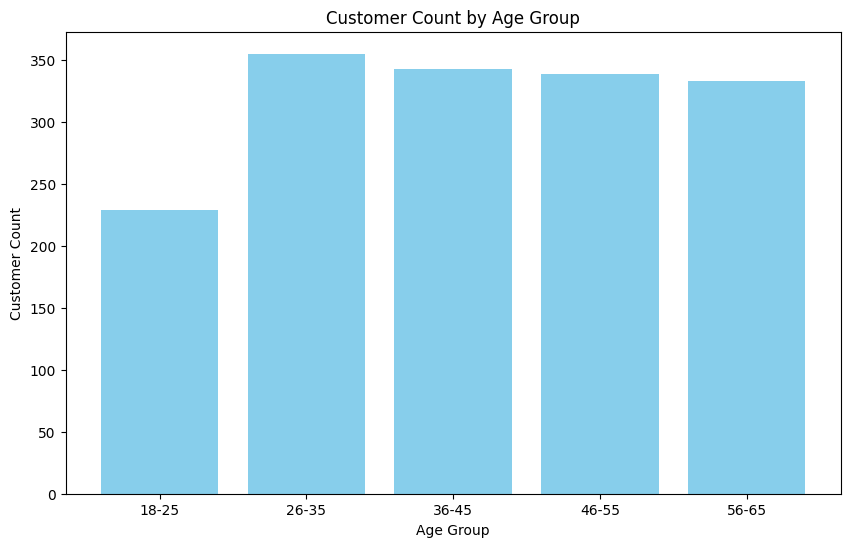

In [ ]:
# Data preparation for separate charts
preferred_features = age_group_analysis['Preferred Features']
interest_levels = age_group_analysis['Interest in EVs']

# Bar chart for Customer Count by Age Group
plt.figure(figsize=(10, 6))
customer_counts = age_group_analysis['Customer Count']
age_groups = age_group_analysis.index.astype(str)
plt.bar(age_groups, customer_counts, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Customer Count by Age Group')
plt.show()

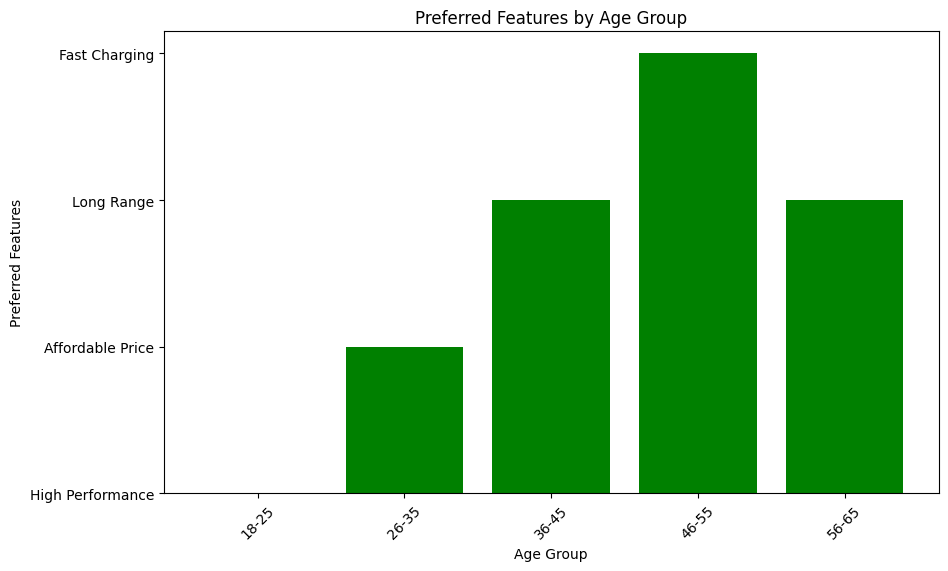

<ipython-input-38-9610031eca24>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interest_counts = individual_data.groupby(['Age Group', 'Interest in EVs']).size().unstack().fillna(0)


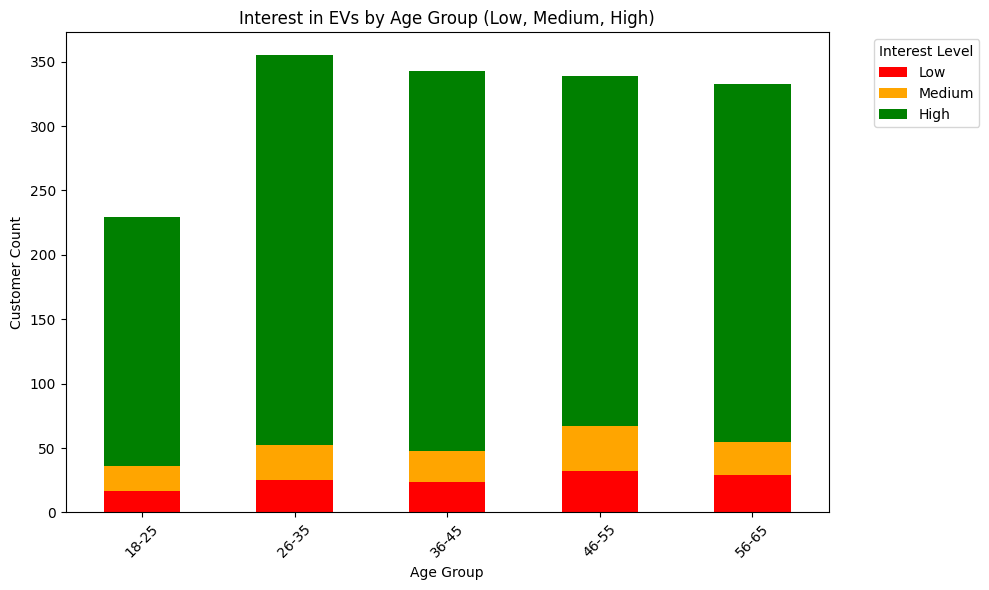

In [ ]:
# Bar chart for Preferred Features by Age Group
plt.figure(figsize=(10, 6))
plt.bar(age_groups, preferred_features, color='green')
plt.xlabel('Age Group')
plt.ylabel('Preferred Features')
plt.title('Preferred Features by Age Group')
plt.xticks(rotation=45)
plt.show()

# Prepare data for interest levels based on frequency
interest_counts = individual_data.groupby(['Age Group', 'Interest in EVs']).size().unstack().fillna(0)

# Reorder columns for Low, Medium, High order
interest_counts = interest_counts[['Low', 'Medium', 'High']]

# Plot the chart
interest_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'orange', 'green'])
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Interest in EVs by Age Group (Low, Medium, High)')
plt.legend(title='Interest Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Define income brackets for segmentation
income_bins = [0, 500000, 1000000, 2000000, 5000000]
income_labels = ['Low Income (<5L)', 'Mid Income (5L-10L)', 'Upper Mid Income (10L-20L)', 'High Income (>20L)']

# Check for null values in relevant columns and clean the data
cleaned_data = individual_data.dropna(subset=['Annual Income (INR)', 'Interest in EVs', 'Preferred Features'])

# Reapply income group segmentation
cleaned_data['Income Group'] = pd.cut(cleaned_data['Annual Income (INR)'], bins=income_bins, labels=income_labels, right=False)
individual_data['Income Group'] = pd.cut(individual_data['Annual Income (INR)'], bins=income_bins, labels=income_labels, right=False)

# Reanalyze EV interest and preferred features by income group
income_group_analysis = cleaned_data.groupby('Income Group').agg({
    'Interest in EVs': lambda x: x.value_counts().idxmax() if not x.empty else 'No Data',
    'Preferred Features': lambda x: x.value_counts().idxmax() if not x.empty else 'No Data',
    'Aadhar Number/Unique ID': 'count'  # Count of customers in each group
}).rename(columns={'Aadhar Number/Unique ID': 'Customer Count'})

# Display the updated income group analysis
income_group_analysis

<ipython-input-39-717b07b08f43>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_analysis = cleaned_data.groupby('Income Group').agg({


,Interest in EVs,Preferred Features,Customer Count
Income Group,,,
Low Income (<5L),High,Fast Charging,374
Mid Income (5L-10L),High,Long Range,495
Upper Mid Income (10L-20L),High,Fast Charging,931
High Income (>20L),No Data,No Data,0


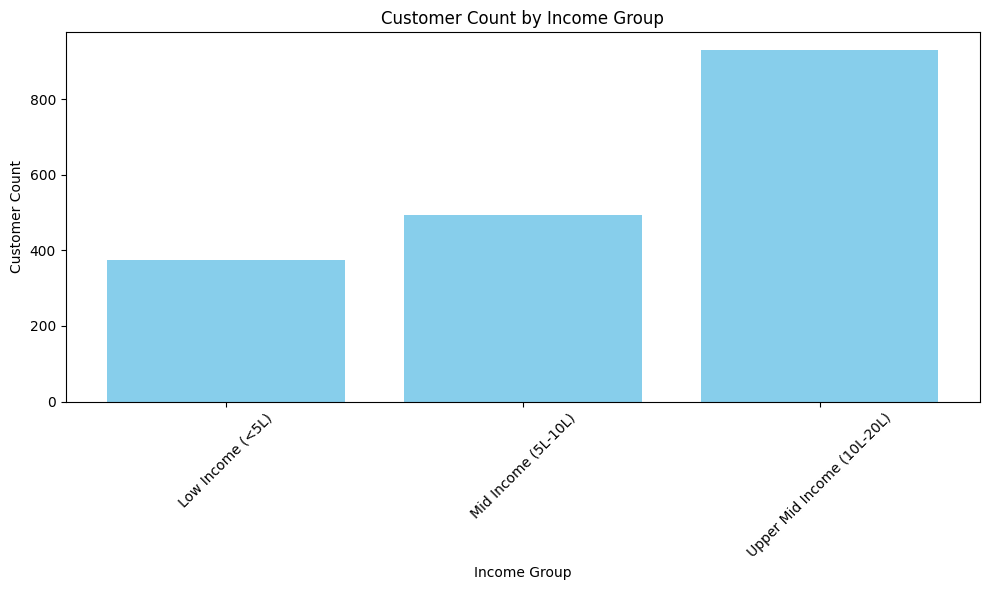

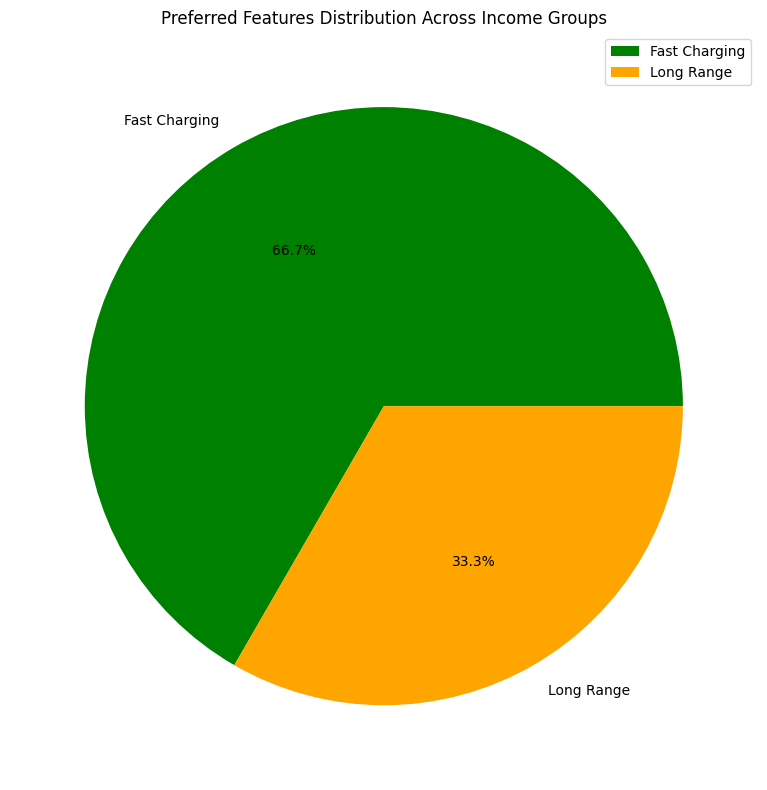

<ipython-input-40-1cb37eb8273a>:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  interest_distribution = cleaned_data.pivot_table(


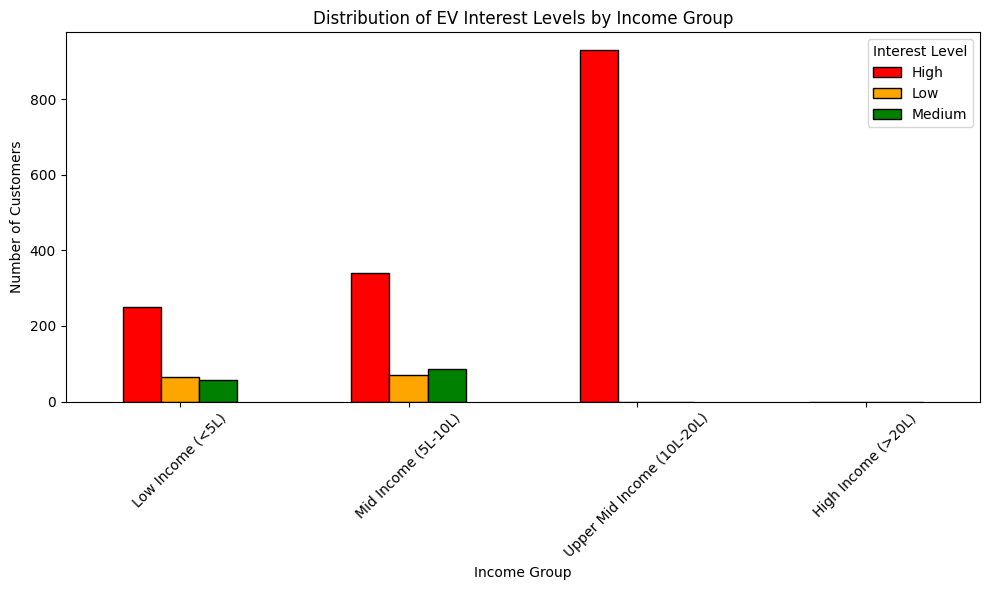

In [ ]:
# Filter out income groups with no data
valid_income_groups = income_group_analysis[income_group_analysis['Customer Count'] > 0]

# Create a bar chart for Customer Count by Income Group
plt.figure(figsize=(10, 6))
plt.bar(valid_income_groups.index, valid_income_groups['Customer Count'], color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Customer Count')
plt.title('Customer Count by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a pie chart for Preferred Features by Income Group
plt.figure(figsize=(8, 8))
valid_income_groups['Preferred Features'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'blue'], legend=True
)
plt.title('Preferred Features Distribution Across Income Groups')
plt.ylabel('')  # Remove the y-label for cleaner visualization
plt.tight_layout()
plt.show()

# Create a grouped bar chart to show the distribution of EV interest levels across income groups
# Reorganize data for a clear grouped bar chart
interest_distribution = cleaned_data.pivot_table(
    index='Income Group',
    columns='Interest in EVs',
    values='Aadhar Number/Unique ID',
    aggfunc='count',
    fill_value=0
)

# Plot the grouped bar chart
interest_distribution.plot(kind='bar', figsize=(10, 6), color=['red', 'orange', 'green'], edgecolor='black')
plt.title('Distribution of EV Interest Levels by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Interest Level')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze EV interest and preferred features by gender
gender_analysis = cleaned_data.groupby('Gender').agg({
    'Interest in EVs': lambda x: x.value_counts().idxmax(),
    'Preferred Features': lambda x: x.value_counts().idxmax(),
    'Aadhar Number/Unique ID': 'count'  # Count of customers for each gender
}).rename(columns={'Aadhar Number/Unique ID': 'Customer Count'})

# Reorder columns to have "Gender" as the first column
gender_analysis = gender_analysis.reset_index()

# Display the gender-based analysis
gender_analysis

,Gender,Interest in EVs,Preferred Features,Customer Count
0,Female,High,High Performance,970
1,Male,High,Long Range,830


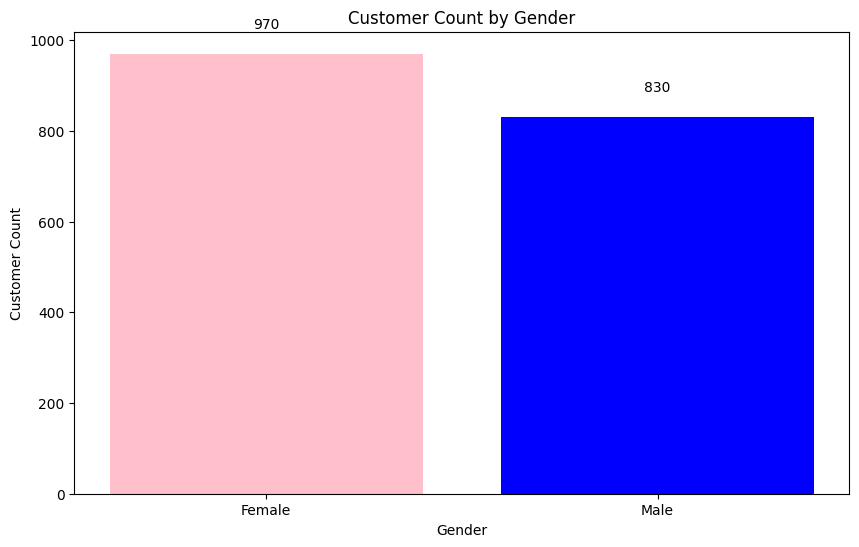

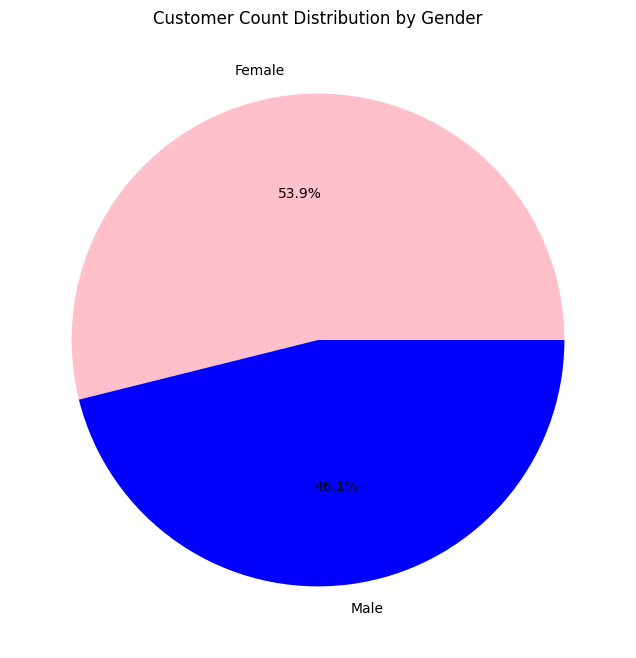

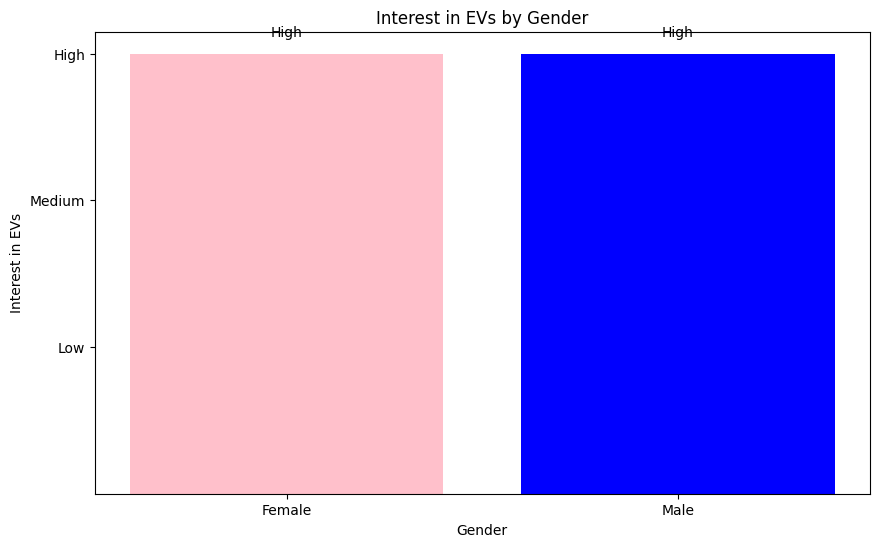

In [ ]:
gender_analysis

# Bar Chart for Customer Count by Gender
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_analysis['Gender'], gender_analysis['Customer Count'], color=['pink', 'blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.title('Customer Count by Gender')

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

plt.show()

# Pie Chart for Customer Count by Gender
plt.figure(figsize=(8, 8))
plt.pie(gender_analysis['Customer Count'], labels=gender_analysis['Gender'], autopct='%1.1f%%', colors=['pink', 'blue', 'green'])
plt.title('Customer Count Distribution by Gender')
plt.show()

# Bar Chart for Interest in EVs by Gender
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_analysis['Gender'], gender_analysis['Interest in EVs'].map({'High': 3, 'Medium': 2, 'Low': 1}), color=['pink', 'blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Interest in EVs')
plt.title('Interest in EVs by Gender')
plt.xticks(ticks=[0, 1,], labels=['Female', 'Male'])
plt.yticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])

# Adding value labels on top of the bars
for bar, label in zip(bars, gender_analysis['Interest in EVs']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, label, ha='center', va='bottom')

plt.show()




In [ ]:
region_data = pd.read_csv('/content/region_ev_data.csv')

In [ ]:
region_data.head()

,Region,Charging Station Utilization (%),Energy Cost per Charge (INR),Downtime (hours/week),EV Adoption Rate (%),CO2 Emissions Saved per km (tons),Sales Volume (Average sale in a quarter),Top Competitor,Top Competitor Market Share (%),Second Competitor,Second Competitor Market Share (%),Region Area (sq km),Population Density
0,Region-1,55.58,1346.86,6.00,15.19,0.272,7624,BrandB,24.80,BrandB,23.34,110,3707
1,Region-2,31.00,412.63,5.18,16.50,0.332,3704,BrandD,31.04,BrandD,27.98,277,4548
2,Region-3,41.00,1192.79,5.84,32.66,0.362,8657,BrandB,23.13,BrandC,19.31,187,1105
3,Region-4,38.93,1149.88,5.63,33.08,0.286,3091,BrandC,28.17,BrandC,15.75,84,1539
4,Region-5,59.46,990.67,5.24,25.91,0.277,9751,BrandC,33.79,BrandD,20.93,149,1060


In [ ]:
operational_efficiency = region_data[['Region', 'Charging Station Utilization (%)',
                                      'Energy Cost per Charge (INR)',
                                      'Downtime (hours/week)']]

# Summary statistics for operational efficiency
efficiency_summary = operational_efficiency.describe()

# Sort regions by Charging Station Utilization for efficiency ranking
utilization_sorted = operational_efficiency.sort_values(by='Charging Station Utilization (%)', ascending=False)

# Display the sorted utilization data to understand region-specific operational efficiency
print(utilization_sorted)

# Display summary statistics to identify trends
print(efficiency_summary)

       Region  Charging Station Utilization (%)  Energy Cost per Charge (INR)  \
86  Region-87                             69.90                        773.23   
96  Region-97                             69.84                       1347.48   
60  Region-61                             69.58                        642.24   
33  Region-34                             68.92                       1365.81   
98  Region-99                             68.84                        455.65   
..        ...                               ...                           ...   
67  Region-68                             31.28                        661.81   
9   Region-10                             31.19                        899.10   
12  Region-13                             31.06                        689.73   
1    Region-2                             31.00                        412.63   
19  Region-20                             30.26                       1069.87   

    Downtime (hours/week)  

In [ ]:
# Simplify the analysis by focusing on key metrics and grouping regions into performance tiers
# Define performance tiers based on Charging Station Utilization
def categorize_performance(utilization):
    if utilization >= 60:
        return 'High Utilization'
    elif 40 <= utilization < 60:
        return 'Moderate Utilization'
    else:
        return 'Low Utilization'

operational_efficiency['Utilization Category'] = operational_efficiency['Charging Station Utilization (%)'].apply(categorize_performance)

# Group data by Utilization Category for aggregated insights
grouped_efficiency = operational_efficiency.groupby('Utilization Category').agg({
    'Charging Station Utilization (%)': 'mean',
    'Energy Cost per Charge (INR)': 'mean',
    'Downtime (hours/week)': 'mean',
    'Region': 'count'  # Count of regions in each category
}).rename(columns={'Region': 'Region Count'})

# Display the simplified analysis
grouped_efficiency

<ipython-input-54-592caa6701a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operational_efficiency['Utilization Category'] = operational_efficiency['Charging Station Utilization (%)'].apply(categorize_performance)


,Charging Station Utilization (%),Energy Cost per Charge (INR),Downtime (hours/week),Region Count
Utilization Category,,,,
High Utilization,65.650952,1053.858571,2.924286,21
Low Utilization,35.326552,892.979310,3.662414,29
Moderate Utilization,50.014898,903.616939,3.904082,49


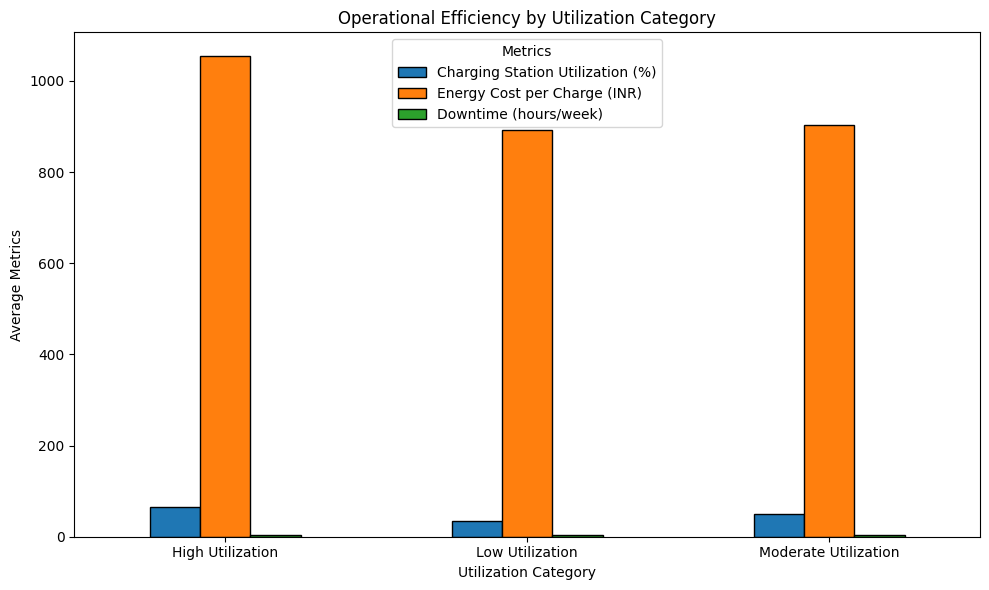

In [ ]:
import matplotlib.pyplot as plt

# Visualization for grouped operational efficiency
grouped_efficiency[['Charging Station Utilization (%)', 'Energy Cost per Charge (INR)', 'Downtime (hours/week)']].plot(
    kind='bar', figsize=(10, 6), edgecolor='black'
)
plt.title('Operational Efficiency by Utilization Category')
plt.xlabel('Utilization Category')
plt.ylabel('Average Metrics')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Filter regions for High Utilization and Low Utilization
high_utilization_regions = operational_efficiency[
    operational_efficiency['Utilization Category'] == 'High Utilization'
]
low_utilization_regions = operational_efficiency[
    operational_efficiency['Utilization Category'] == 'Low Utilization'
]

# Display the high and low utilization regions to the user
print(high_utilization_regions)
print(low_utilization_regions)

       Region  Charging Station Utilization (%)  Energy Cost per Charge (INR)  \
6    Region-7                             65.69                       1105.06   
18  Region-19                             62.38                       1102.84   
20  Region-21                             62.23                        568.12   
24  Region-25                             68.29                        983.39   
28  Region-29                             63.90                       1422.01   
30  Region-31                             62.29                       1314.83   
33  Region-34                             68.92                       1365.81   
36  Region-37                             63.18                        934.59   
38  Region-39                             64.47                       1236.66   
53  Region-54                             67.47                        881.91   
60  Region-61                             69.58                        642.24   
64  Region-65               

In [ ]:
# Get the top 10 regions for each utilization category
top_10_high_utilization = high_utilization_regions.nlargest(10, 'Charging Station Utilization (%)')
top_10_moderate_utilization = operational_efficiency[
    operational_efficiency['Utilization Category'] == 'Moderate Utilization'
].nlargest(10, 'Charging Station Utilization (%)')
top_10_low_utilization = low_utilization_regions.nsmallest(10, 'Charging Station Utilization (%)')

# Display the top 10 regions for each category
top_10_high_utilization
top_10_moderate_utilization
top_10_low_utilization

,Region,Charging Station Utilization (%),Energy Cost per Charge (INR),Downtime (hours/week),Utilization Category
19,Region-20,30.26,1069.87,4.59,Low Utilization
1,Region-2,31.00,412.63,5.18,Low Utilization
12,Region-13,31.06,689.73,2.33,Low Utilization
9,Region-10,31.19,899.10,1.29,Low Utilization
67,Region-68,31.28,661.81,4.52,Low Utilization
41,Region-42,31.83,922.81,4.10,Low Utilization
89,Region-90,31.88,609.23,1.46,Low Utilization
94,Region-95,32.54,1415.59,4.19,Low Utilization
44,Region-45,33.19,1359.68,3.61,Low Utilization
7,Region-8,33.48,522.71,2.07,Low Utilization


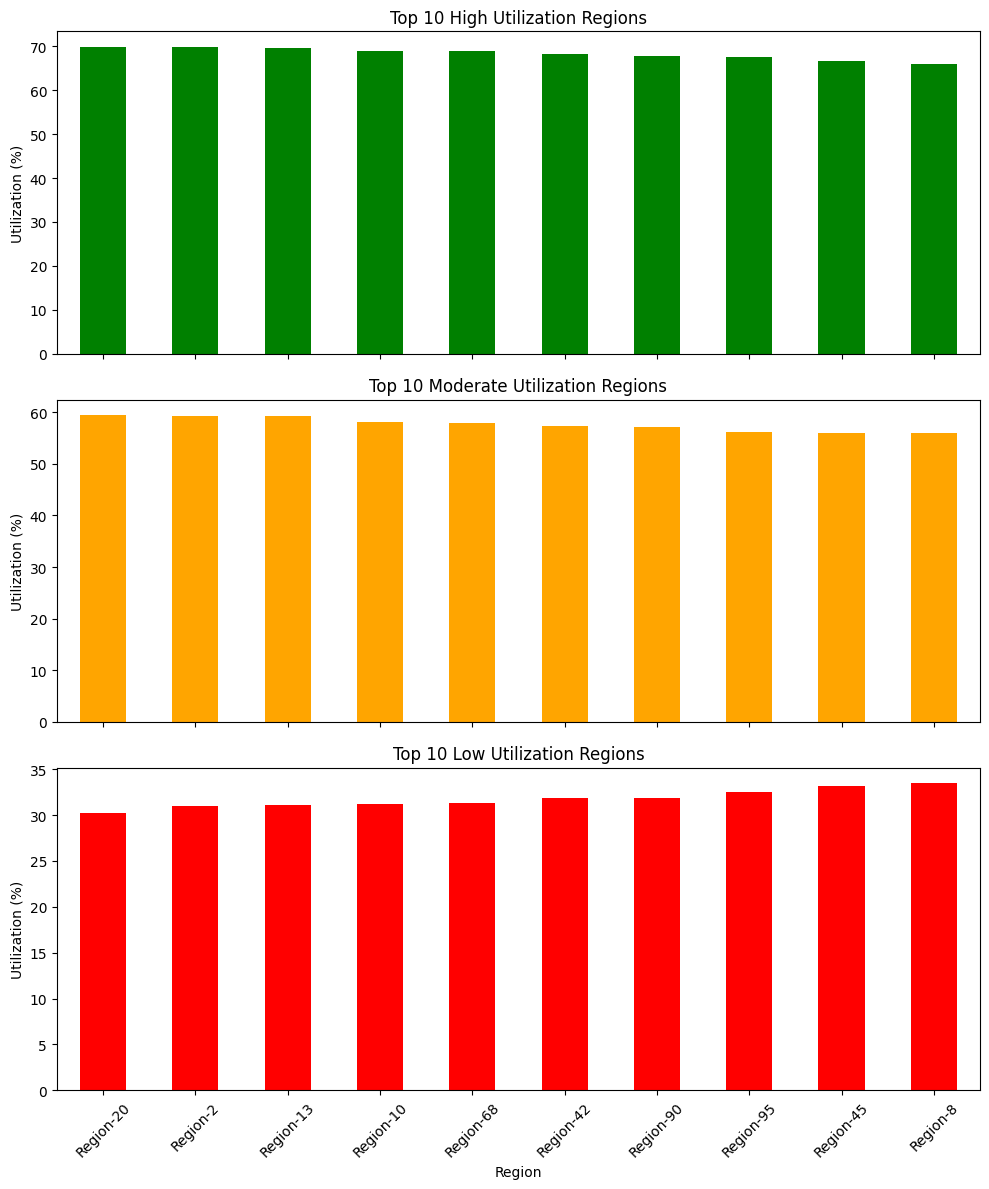

In [ ]:
# Prepare data for visualization by creating a combined summary
summary_high = top_10_high_utilization[['Region', 'Charging Station Utilization (%)']].set_index('Region')
summary_moderate = top_10_moderate_utilization[['Region', 'Charging Station Utilization (%)']].set_index('Region')
summary_low = top_10_low_utilization[['Region', 'Charging Station Utilization (%)']].set_index('Region')

# Create a simpler bar chart for each category
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# High Utilization
summary_high.plot(kind='bar', ax=ax[0], color='green', legend=False)
ax[0].set_title('Top 10 High Utilization Regions')
ax[0].set_ylabel('Utilization (%)')
ax[0].tick_params(axis='x', rotation=45)

# Moderate Utilization
summary_moderate.plot(kind='bar', ax=ax[1], color='orange', legend=False)
ax[1].set_title('Top 10 Moderate Utilization Regions')
ax[1].set_ylabel('Utilization (%)')
ax[1].tick_params(axis='x', rotation=45)

# Low Utilization
summary_low.plot(kind='bar', ax=ax[2], color='red', legend=False)
ax[2].set_title('Top 10 Low Utilization Regions')
ax[2].set_ylabel('Utilization (%)')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

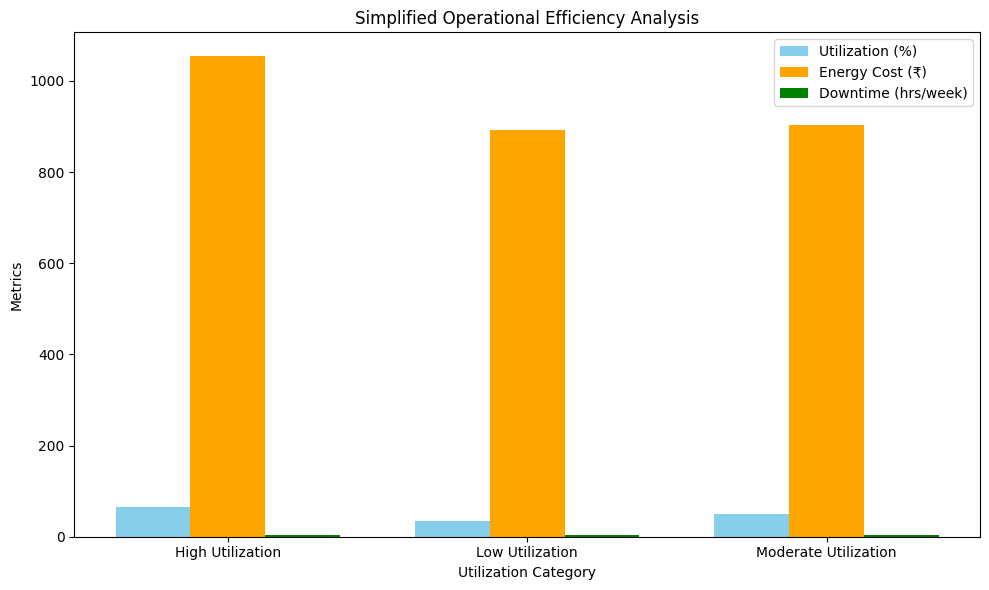

In [ ]:
# Simplify visualization for Operational Efficiency by Utilization Category
grouped_efficiency.reset_index(inplace=True)

# Bar chart for average metrics by utilization category
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
x = range(len(grouped_efficiency))

# Plot each metric as grouped bars
ax.bar(x, grouped_efficiency['Charging Station Utilization (%)'], bar_width, label='Utilization (%)', color='skyblue')
ax.bar(
    [i + bar_width for i in x],
    grouped_efficiency['Energy Cost per Charge (INR)'],
    bar_width,
    label='Energy Cost (₹)',
    color='orange',
)
ax.bar(
    [i + 2 * bar_width for i in x],
    grouped_efficiency['Downtime (hours/week)'],
    bar_width,
    label='Downtime (hrs/week)',
    color='green',
)

# Set labels and title
ax.set_xlabel('Utilization Category')
ax.set_ylabel('Metrics')
ax.set_title('Simplified Operational Efficiency Analysis')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(grouped_efficiency['Utilization Category'])
ax.legend()

plt.tight_layout()
plt.show()

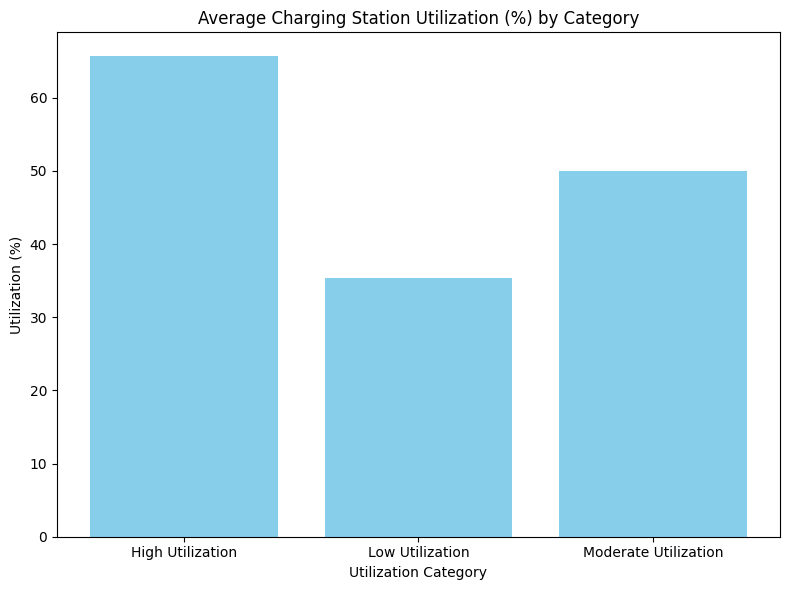

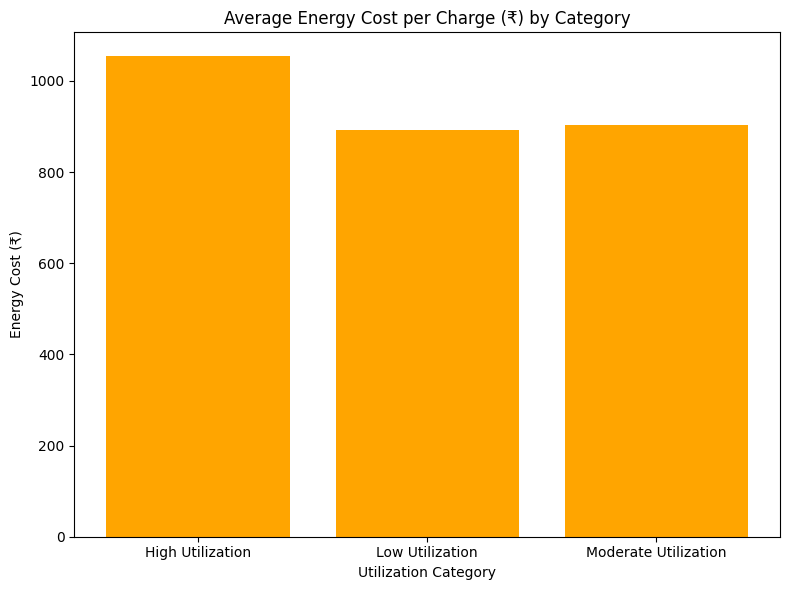

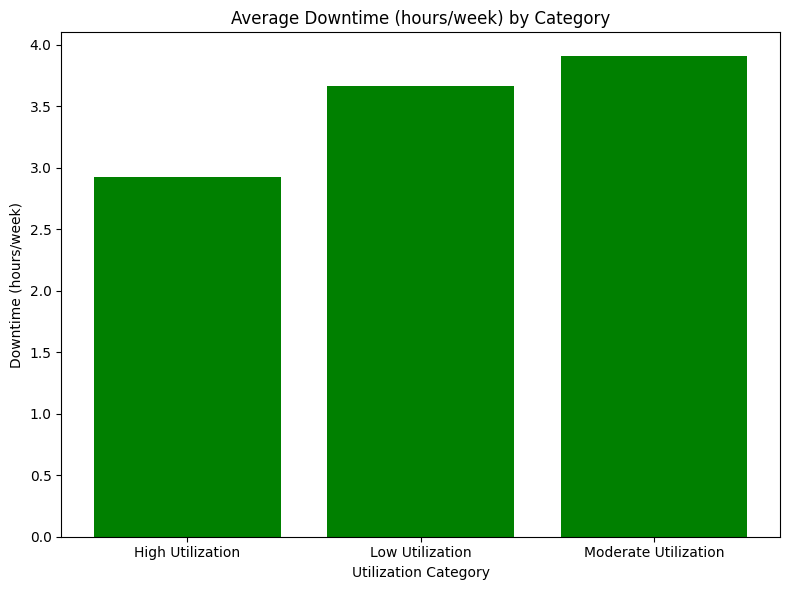

In [ ]:
# Create separate bar charts for each metric in Operational Efficiency Analysis

# Chart for Charging Station Utilization
plt.figure(figsize=(8, 6))
plt.bar(grouped_efficiency['Utilization Category'], grouped_efficiency['Charging Station Utilization (%)'], color='skyblue')
plt.title('Average Charging Station Utilization (%) by Category')
plt.xlabel('Utilization Category')
plt.ylabel('Utilization (%)')
plt.tight_layout()
plt.show()

# Chart for Energy Cost per Charge
plt.figure(figsize=(8, 6))
plt.bar(grouped_efficiency['Utilization Category'], grouped_efficiency['Energy Cost per Charge (INR)'], color='orange')
plt.title('Average Energy Cost per Charge (₹) by Category')
plt.xlabel('Utilization Category')
plt.ylabel('Energy Cost (₹)')
plt.tight_layout()
plt.show()

# Chart for Downtime
plt.figure(figsize=(8, 6))
plt.bar(grouped_efficiency['Utilization Category'], grouped_efficiency['Downtime (hours/week)'], color='green')
plt.title('Average Downtime (hours/week) by Category')
plt.xlabel('Utilization Category')
plt.ylabel('Downtime (hours/week)')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze adoption and environmental impact metrics
adoption_impact = region_data[['Region', 'EV Adoption Rate (%)', 'CO2 Emissions Saved per km (tons)',
                               'Sales Volume (Average sale in a quarter)']] # Corrected column name

# Summary statistics for adoption and environmental impact
adoption_summary = adoption_impact.describe()

# Sort regions by EV Adoption Rate for ranking
adoption_sorted = adoption_impact.sort_values(by='EV Adoption Rate (%)', ascending=False)

# Display sorted data and summary statistics for adoption and environmental impact
adoption_sorted
adoption_summary
adoption_summary = adoption_impact.describe()

# Sort regions by EV Adoption Rate for ranking
adoption_sorted = adoption_impact.sort_values(by='EV Adoption Rate (%)', ascending=False)

# Display sorted data and summary statistics for adoption and environmental impact
adoption_sorted
adoption_summary

,EV Adoption Rate (%),CO2 Emissions Saved per km (tons),Sales Volume (Average sale in a quarter)
count,99.000000,99.000000,99.000000
mean,25.642929,0.298828,5503.353535
std,6.118374,0.106852,2607.144326
min,15.010000,0.102000,1207.000000
25%,20.660000,0.202000,3079.500000
50%,25.910000,0.302000,5558.000000
75%,31.510000,0.385500,7894.000000
max,34.620000,0.495000,9837.000000


In [ ]:
# Group data by Adoption Category for aggregated insights
grouped_adoption = adoption_impact.groupby('Adoption Category').agg({
    'EV Adoption Rate (%)': 'mean',
    'CO2 Emissions Saved per km (tons)': 'mean',
    'Sales Volume (Average sale in a quarter)': 'mean',  # Corrected column name
    'Region': 'count'  # Count of regions in each category
}).rename(columns={'Region': 'Region Count'})

# Display the simplified analysis
grouped_adoption

,EV Adoption Rate (%),CO2 Emissions Saved per km (tons),Sales Volume (Average sale in a quarter),Region Count
Adoption Category,,,,
High Adoption,32.601212,0.308818,5059.727273,33
Moderate Adoption,22.163788,0.293833,5725.166667,66


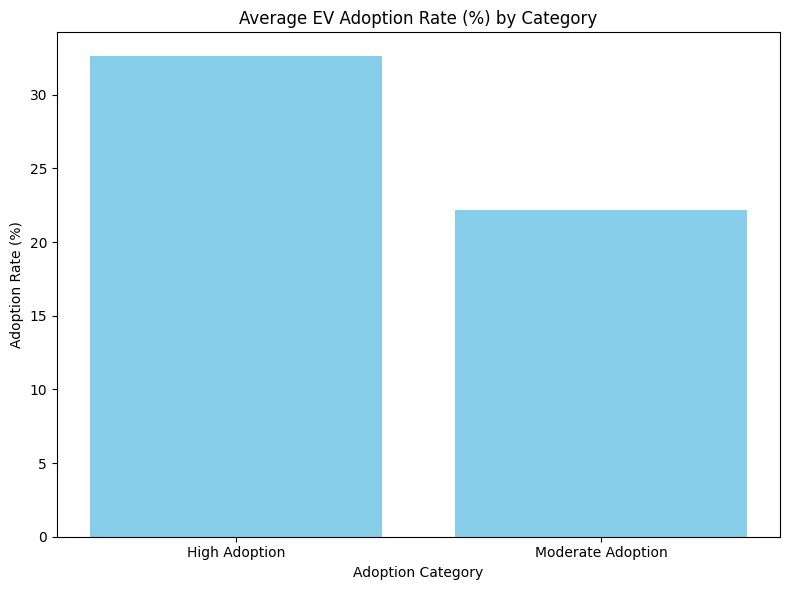

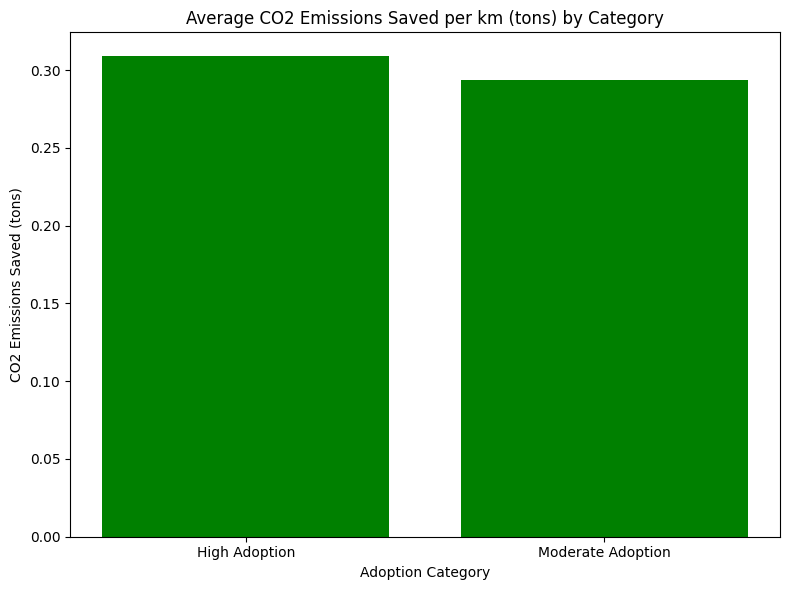

In [ ]:
# Chart for Average EV Adoption Rate by Category
plt.figure(figsize=(8, 6))
plt.bar(grouped_adoption.index, grouped_adoption['EV Adoption Rate (%)'], color='skyblue')
plt.title('Average EV Adoption Rate (%) by Category')
plt.xlabel('Adoption Category')
plt.ylabel('Adoption Rate (%)')
plt.tight_layout()
plt.show()

# Chart for Average CO2 Emissions Saved by Category
plt.figure(figsize=(8, 6))
plt.bar(grouped_adoption.index, grouped_adoption['CO2 Emissions Saved per km (tons)'], color='green')
plt.title('Average CO2 Emissions Saved per km (tons) by Category')
plt.xlabel('Adoption Category')
plt.ylabel('CO2 Emissions Saved (tons)')
plt.tight_layout()
plt.show()


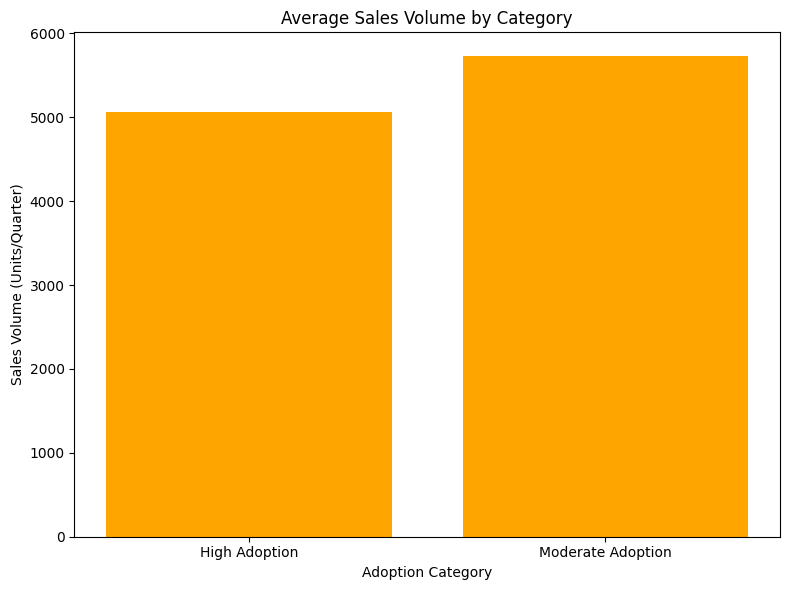

In [ ]:
# Chart for Average Sales Volume by Category
plt.figure(figsize=(8, 6))
plt.bar(grouped_adoption.index, grouped_adoption['Sales Volume (Average sale in a quarter)'], color='orange') # Corrected column name
plt.title('Average Sales Volume by Category')
plt.xlabel('Adoption Category')
plt.ylabel('Sales Volume (Units/Quarter)')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze competitor dynamics from the dataset
competitor_analysis = region_data[['Region', 'Top Competitor', 'Top Competitor Market Share (%)',
                                    'Second Competitor', 'Second Competitor Market Share (%)']]

# Summarize top competitors and their market share
top_competitor_summary = competitor_analysis.groupby('Top Competitor').agg({
    'Top Competitor Market Share (%)': ['mean', 'count']  # Average market share and number of regions
}).rename(columns={'mean': 'Avg Market Share (%)', 'count': 'Region Count'})

# Summarize second competitors and their market share
second_competitor_summary = competitor_analysis.groupby('Second Competitor').agg({
    'Second Competitor Market Share (%)': ['mean', 'count']
}).rename(columns={'mean': 'Avg Market Share (%)', 'count': 'Region Count'})

# Display the competitor summaries
top_competitor_summary
second_competitor_summary

Second Competitor Market Share (%)             
                                Avg Market Share (%) Region Count
Second Competitor                                                
BrandA                                     20.412778           18
BrandB                                     20.232917           24
BrandC                                     19.714583           24
BrandD                                     20.978182           33

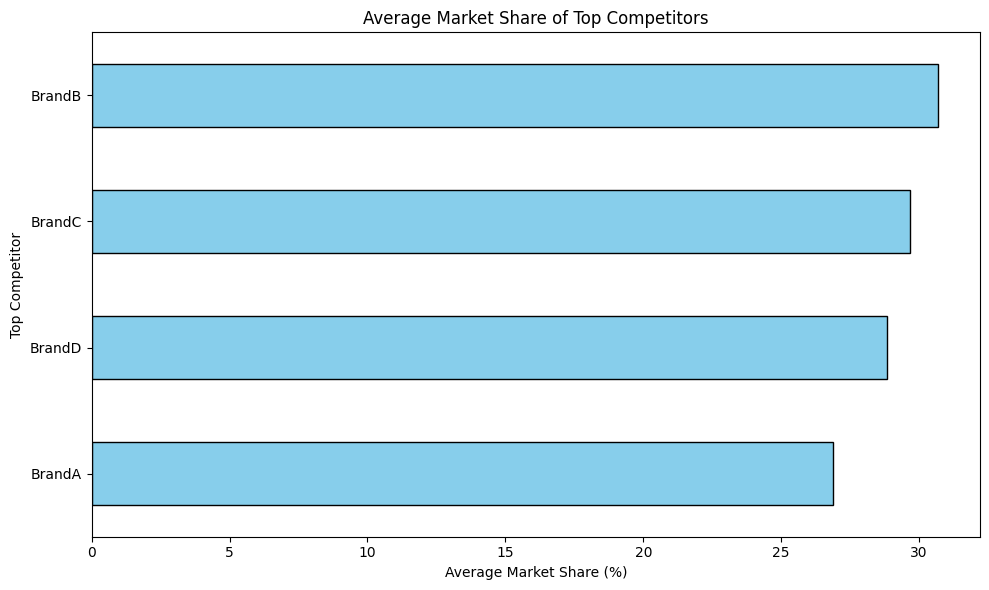

In [ ]:
# Prepare data for visualization
top_competitor_summary.columns = ['Avg Market Share (%)', 'Region Count']
second_competitor_summary.columns = ['Avg Market Share (%)', 'Region Count']

# Visualization for Top Competitors
plt.figure(figsize=(10, 6))
top_competitor_summary['Avg Market Share (%)'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Market Share of Top Competitors')
plt.xlabel('Average Market Share (%)')
plt.ylabel('Top Competitor')
plt.tight_layout()
plt.show()


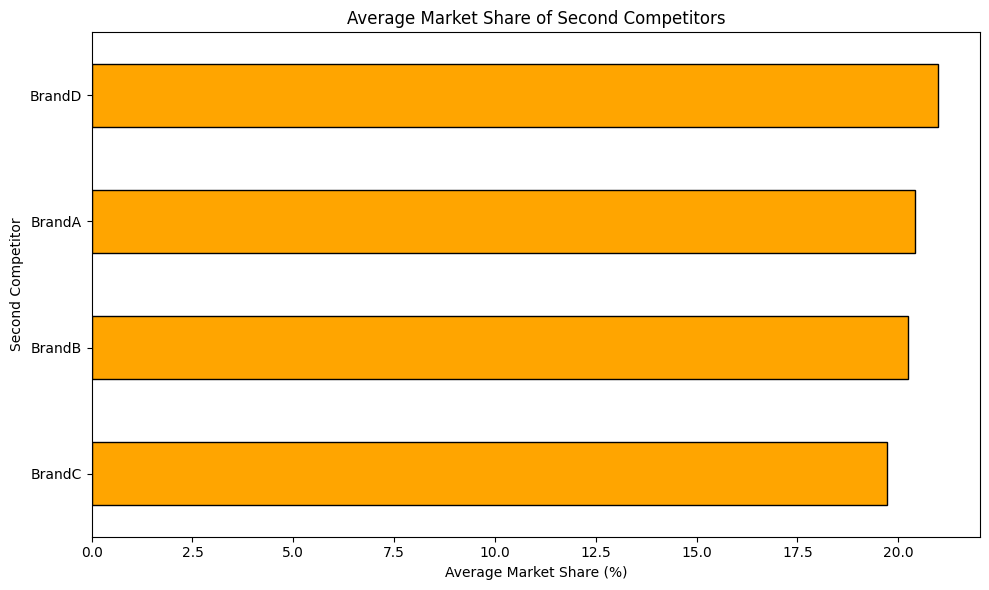

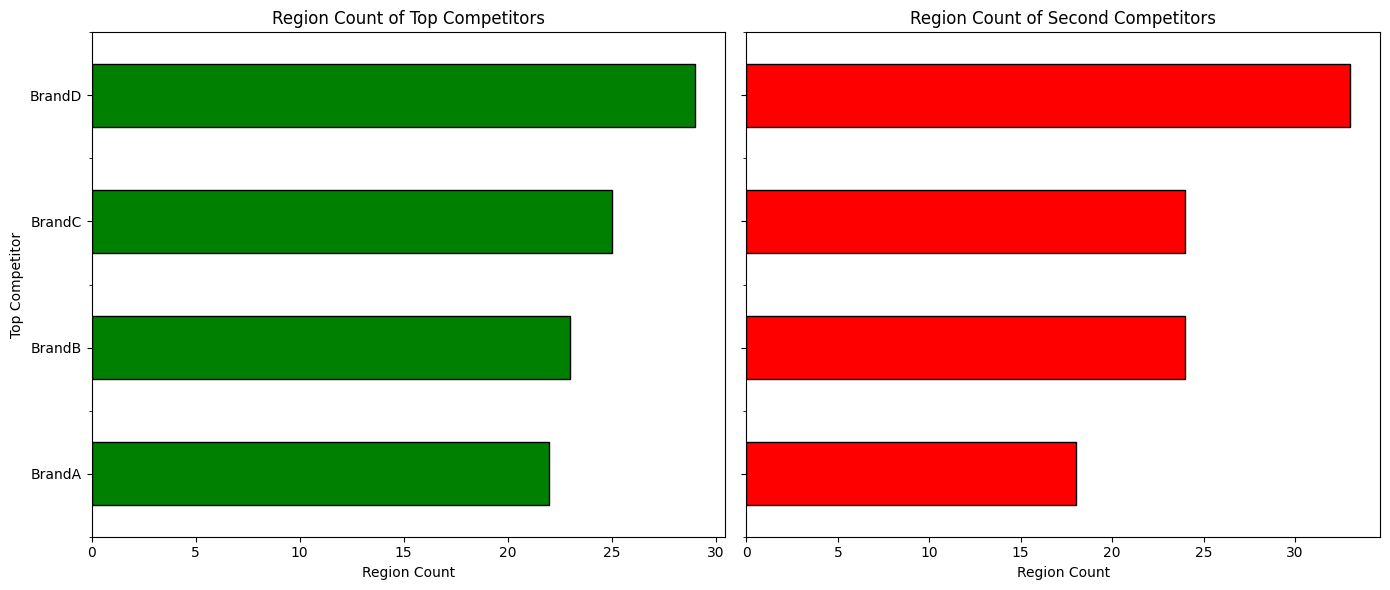

In [ ]:
# Visualization for Second Competitors
plt.figure(figsize=(10, 6))
second_competitor_summary['Avg Market Share (%)'].sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title('Average Market Share of Second Competitors')
plt.xlabel('Average Market Share (%)')
plt.ylabel('Second Competitor')
plt.tight_layout()
plt.show()

# Visualization for Region Counts
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Top Competitors Region Count
top_competitor_summary['Region Count'].sort_values().plot(kind='barh', ax=ax[0], color='green', edgecolor='black')
ax[0].set_title('Region Count of Top Competitors')
ax[0].set_xlabel('Region Count')
ax[0].set_ylabel('Top Competitor')

# Second Competitors Region Count
second_competitor_summary['Region Count'].sort_values().plot(kind='barh', ax=ax[1], color='red', edgecolor='black')
ax[1].set_title('Region Count of Second Competitors')
ax[1].set_xlabel('Region Count')

plt.tight_layout()
plt.show()

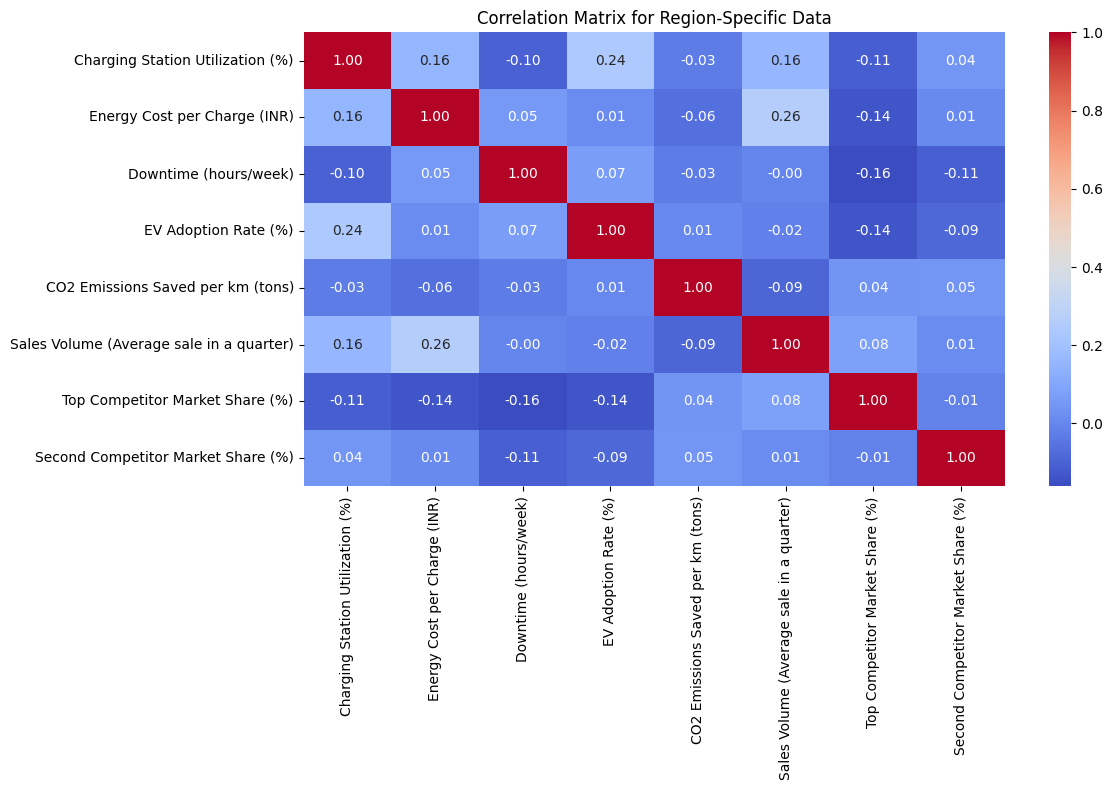

,Charging Station Utilization (%),Energy Cost per Charge (INR),Downtime (hours/week),EV Adoption Rate (%),CO2 Emissions Saved per km (tons),Sales Volume (Average sale in a quarter),Top Competitor Market Share (%),Second Competitor Market Share (%)
Charging Station Utilization (%),1.000000,0.156003,-0.104018,0.236201,-0.033873,0.160272,-0.113111,0.043520
Energy Cost per Charge (INR),0.156003,1.000000,0.053689,0.014816,-0.062484,0.261166,-0.137872,0.007019
Downtime (hours/week),-0.104018,0.053689,1.000000,0.066922,-0.030428,-0.002458,-0.160900,-0.108481
EV Adoption Rate (%),0.236201,0.014816,0.066922,1.000000,0.006791,-0.016974,-0.135417,-0.086082
CO2 Emissions Saved per km (tons),-0.033873,-0.062484,-0.030428,0.006791,1.000000,-0.088927,0.043017,0.047307
Sales Volume (Average sale in a quarter),0.160272,0.261166,-0.002458,-0.016974,-0.088927,1.000000,0.076774,0.013886
Top Competitor Market Share (%),-0.113111,-0.137872,-0.160900,-0.135417,0.043017,0.076774,1.000000,-0.013539
Second Competitor Market Share (%),0.043520,0.007019,-0.108481,-0.086082,0.047307,0.013886,-0.013539,1.000000


In [ ]:
# Perform correlation analysis on numerical columns in the dataset
numerical_columns = region_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Region Area (sq km)', 'Population Density'])
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap for better visualization

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Region-Specific Data')
plt.tight_layout()
plt.show()

# Display the correlation matrix for reference
correlation_matrix